In [2]:
import os
import glob as glob

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import nibabel as nib
from nilearn import image, plotting
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
from nilearn.image import load_img, new_img_like
from nilearn.input_data import NiftiMasker
from nilearn import datasets, plotting, input_data, signal, image  
from nilearn.input_data import NiftiLabelsMasker

from secondlevel_utils import *

/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Step 1: Loading data
--------------------

In [3]:
zmaps_dir = f'/home/finc/Dropbox/Projects/SelfReg/data/neuroimaging/1stlevel_surveyMedley/'

subs_list = os.listdir(zmaps_dir)
sub = 'sub-s358'
parcellation = 'shaefer_400_7'

zmaps = nib.load(f'{zmaps_dir}{sub}/{sub}_surveyMedley_Q_all_zmaps.nii.gz')
zmaps.shape

(89, 105, 89, 40)

Step 2: Loading & preparing parcellation
----------------------------------------

/home/finc/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


(89, 105, 89)

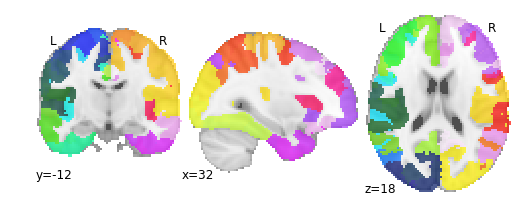

In [4]:
# loading Schaefer atlas (400 regions)
atlas_filename = '/home/finc/Dropbox/Projects/SelfReg/support/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'
parcel = nib.load(atlas_filename)
plotting.plot_roi(atlas_filename, draw_cross = False)

# resampling parcellation to zmaps size
parcel = image.resample_to_img(parcel, zmaps, interpolation='nearest')

parcel.shape

/home/finc/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


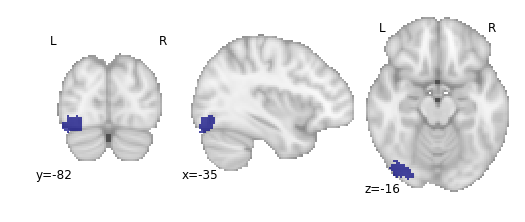

In [5]:
# plotting example of the mask file
mask = get_ROI_from_parcel(parcel, 5, threshold = 3)
plotting.plot_roi(mask, draw_cross = False)

Step 3: Calculating RDMs
------------------------

In [9]:
n_rois = 400
rdms = np.zeros((n_rois, 40, 40))
corr = np.zeros((n_rois, 40, 40))


for i in range(n_rois):
    mask_vector = mask_map_files(roi_i = i, map_files = zmaps, parcel = parcel, extraction_dir = zmaps_dir, 
                   metadata=None, labels=None, rerun=True,
                   threshold=0, save=False)
    cor = np.corrcoef(mask_vector)
    rdms[i,:,:] = 1 - cor
    corr[i,:,:] = cor
    
np.save(f'{zmaps_dir}{sub}/{sub}_{parcellation}_RDMs', rdms)
np.save(f'{zmaps_dir}{sub}/{sub}_{parcellation}_corr', corr)

Masking 0
Masking 1
Masking 2
Masking 3
Masking 4
Masking 5
Masking 6
Masking 7
Masking 8
Masking 9
Masking 10
Masking 11
Masking 12
Masking 13
Masking 14
Masking 15
Masking 16
Masking 17
Masking 18
Masking 19
Masking 20
Masking 21
Masking 22
Masking 23
Masking 24
Masking 25
Masking 26
Masking 27
Masking 28
Masking 29
Masking 30
Masking 31
Masking 32
Masking 33
Masking 34
Masking 35
Masking 36
Masking 37
Masking 38
Masking 39
Masking 40
Masking 41
Masking 42
Masking 43
Masking 44
Masking 45
Masking 46
Masking 47
Masking 48
Masking 49
Masking 50
Masking 51
Masking 52
Masking 53
Masking 54
Masking 55
Masking 56
Masking 57
Masking 58
Masking 59
Masking 60
Masking 61
Masking 62
Masking 63
Masking 64
Masking 65
Masking 66
Masking 67
Masking 68
Masking 69
Masking 70
Masking 71
Masking 72
Masking 73
Masking 74
Masking 75
Masking 76
Masking 77
Masking 78
Masking 79
Masking 80
Masking 81
Masking 82
Masking 83
Masking 84
Masking 85
Masking 86
Masking 87
Masking 88
Masking 89
Masking 90
Masking 9

In [2]:
plotting.plot_matrix(rdms[2,:,:], cmap = 'PuOr')
plt.gca().invert_yaxis()

NameError: name 'rdms' is not defined